### Question – 1 (Using Python)

**4. Visualize how height and weight measurements are varying between lots. Also, how can we see the defect count by lot and product family?**

***Answer***

To visualize how the ***height*** and ***weight*** measurements vary between different lots, two line plots are created for  ***T_Height*** by lot and ***T_Weight*** by lot separately.

1. First, the plot "*T_Height by Lot*" displays ***T_Height*** changes by lot, with separate lines for each lot and ***Unit_No*** on the x-axis and ***T_Height*** on the y-axis
2. Second, the plot "*T_Weight by Lot*" displays ***T_Weight*** changes by lot, with separate lines for each lot and ***Unit_No*** on the x-axis and ***T_Height*** on the y-axis

To show the defect count by lot and product family, I counted the measurement occurrences that are less than LSL or upper than USL. LSL and USL are specified in specifications sheet. The counts are listed in the output tables and visualized using bar chart where bars represent the count of defects by product family and lot. Product family is extracted from the prefix of the product code.

The code below visualizes weight and height variation between different lots.

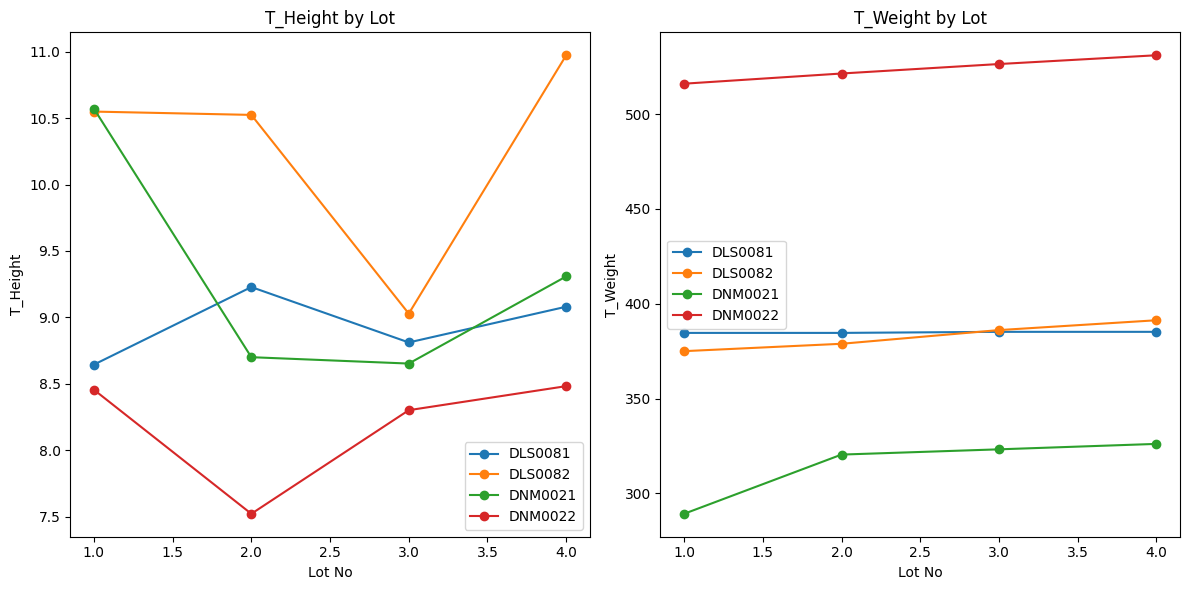

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import pdb;


################################################################################################################
measurements = pd.read_excel('../data/question_1_2.xlsx', sheet_name='Measurements', skiprows=1)
specifications = pd.read_excel('../data/question_1_2.xlsx', sheet_name='Specifications', skiprows=1)
################################################################################################################
# Visualizing Height variation by different lots
plot.figure(figsize=(12, 6))
plot.subplot(1, 2, 1)
plot.title('T_Height by Lot')
plot.xlabel('Lot No')
plot.ylabel('T_Height')
for lot, group in measurements.groupby('Lot No'):
    plot.plot(group['Unit_No'], group['T_Height'], marker='o', label=lot)
plot.legend()

# Visualizing Weight variation by different lots
plot.subplot(1, 2, 2)
plot.title('T_Weight by Lot')
plot.xlabel('Lot No')
plot.ylabel('T_Weight')
for lot, group in measurements.groupby('Lot No'):
    plot.plot(group['Unit_No'], group['T_Weight'], marker='o', label=lot)
plot.legend()

plot.tight_layout()
plot.savefig('../output/question_1_4_measurement_variation_by_lots.png', bbox_inches='tight')



Building on the previous code, the following code generate tables that show the defect count by product family and lot. A defective height or weight is considered to be any value outside the USL and LSL limits as specified in the specifications sheet.

In [3]:

# Note: Ensure previous code cells have been executed...

def is_outside_specifications_limits(row, measurement):
    if measurement == 'T_Height':
        t_name = 'T_height'
    else:
        t_name = 'T_weight'
    usl = specifications.loc[(specifications['Product Code'] == row['Product Code']) & (specifications['T_Name'] == t_name)]['USL'].values[0]
    lsl = specifications.loc[(specifications['Product Code'] == row['Product Code']) & (specifications['T_Name'] == t_name)]['LSL'].values[0]
    return ( row[measurement] < lsl or row[measurement] > usl)

# Count samples in the group exceeding USL
def outside_limits_measurements(data, measurement):
    return data[data.apply( is_outside_specifications_limits, measurement = measurement, axis=1)]
# Extracting product family from product code
measurements['Product Family'] = measurements['Product Code'].apply(lambda pc: pc.split('_')[0] )
defective_height_measurements = outside_limits_measurements(measurements, 'T_Height')
defective_weight_measurements = outside_limits_measurements(measurements, 'T_Weight')

height_defects = defective_height_measurements.groupby(['Lot No', 'Product Family']).size().reset_index(name='Defects Count')
weight_defects = defective_weight_measurements.groupby(['Lot No', 'Product Family']).size().reset_index(name='Defects Count')

# print(measurements)
print("""
The Height defects count by product family and lot are shown in the below table. 
A defective height is considered to be any value outside the USL and LSL limits as specified
in the spepecifications sheet.
""")
print(height_defects)
print('----------------------------------------')
print("""
The Weight defects count by product family and lot are shown in the below table. 
A defective weight is considered to be any value outside the USL and LSL limits as specified
in the spepecifications sheet.
""")
print(weight_defects)
print('----------------------------------------')


The Height defects count by product family and lot are shown in the below table. 
A defective height is considered to be any value outside the USL and LSL limits as specified
in the spepecifications sheet.

    Lot No Product Family  Defects Count
0  DLS0082         LIF001              3
1  DNM0021         LIF002              1
----------------------------------------

The Weight defects count by product family and lot are shown in the below table. 
A defective weight is considered to be any value outside the USL and LSL limits as specified
in the spepecifications sheet.

    Lot No Product Family  Defects Count
0  DNM0021         LIF002              4
1  DNM0022         LIF002              4
----------------------------------------


Moreover, building on the previous code, the below code generates grouped bar chart to visualize the defects count by product family and lot for height and weight measuremnts respectively. A defective measurement is considered to be any value outside the USL and LSL limits as specified in the specifications sheet.

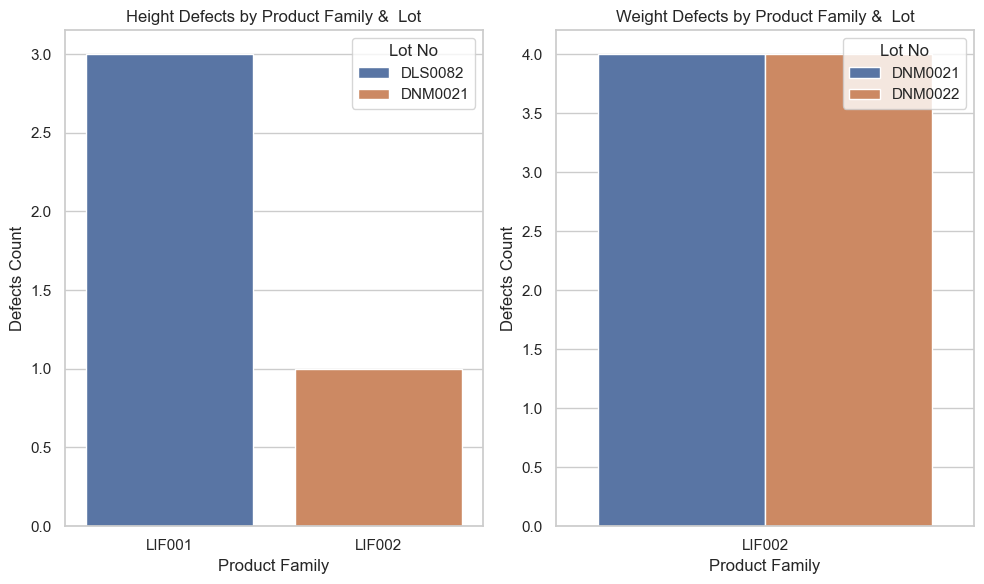

In [4]:
# Note: Ensure previous code cells have been executed...

plot.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Height grouped bar chart 
plot.subplot(1,2,1)
g = sns.barplot(x="Product Family", y="Defects Count", hue="Lot No", data=height_defects)
g.set(title='Height Defects by Product Family &  Lot', xlabel='Product Family', ylabel='Defects Count')
plot.legend(title='Lot No')
# Weight grouped bar chart 
plot.subplot(1,2,2)
g = sns.barplot(x="Product Family", y="Defects Count", hue="Lot No", data=weight_defects)
g.set(title='Weight Defects by Product Family &  Lot', xlabel='Product Family', ylabel='Defects Count')
plot.legend(title='Lot No')

plot.tight_layout()
plot.savefig('../output/question_1_4_defects_by_family_and_lots.png', bbox_inches='tight')

